In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
df_m1p1 = pd.read_csv("resM1P1_plant_names.csv", na_values="NA")
df_m1p1.dropna(axis=0, inplace=True)
print(df_m1p1)
A1 = np.array(df_m1p1['markA.1'].to_list())

     markA.1  markA.2  plant                   name
2      258.0    278.0      3  MF01Q4BC1_A04_016.fsa
3      258.0    278.0      4  MF01Q4BC2_A10_047.fsa
4      258.0    278.0      5  MF01Q4BC3_A12_048.fsa
5      259.0    278.0      6  MF01Q4BP1_A02_015.fsa
6      259.0    278.0      7  MF01Q4BP2_A08_032.fsa
..       ...      ...    ...                    ...
379    262.0    262.0    380      Y9X56_L11_038.fsa
380    267.0    267.0    381      Y9X75_L13_053.fsa
381    274.0    274.0    382      Y9X76_L15_054.fsa
382    286.0    286.0    383      Y9X79_L17_069.fsa
383    274.0    274.0    384      Y9X98_L19_070.fsa

[315 rows x 4 columns]


In [3]:
from sklearn.cluster import k_means

def check_good_cluster_count(cluster_count, X, median_dist_thres):
    centroid, label, inertia = k_means(X.reshape(-1, 1), n_clusters=cluster_count, random_state=0, n_init="auto")
    centers = np.array(sorted(centroid[:, 0]))
    distances = []
    for i in range(len(centers) - 1):
        distances.append(centers[i + 1] - centers[i])
    median_dist = np.median(distances)
    #print(median_dist, distances)
    for i in range(len(centers) - 1):
        if centers[i + 1] - centers[i] < median_dist * median_dist_thres:
            return False
    return centroid[:, 0], label, inertia

def try_clusters(X, median_dist_thres):
    max_cluster_count = len(np.unique(A1))
    for cluster_count in range(max_cluster_count, 0, -1):
        res = check_good_cluster_count(cluster_count, X, median_dist_thres)
        if res != False:
            return res
    print("Best cluster count identification failed")
    sys.exit()


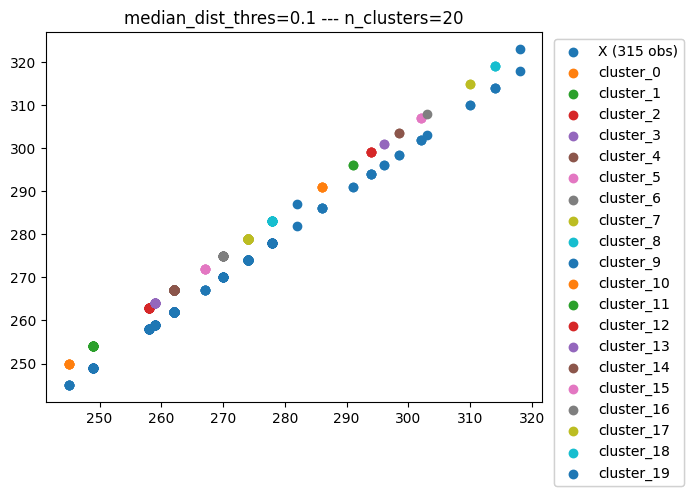

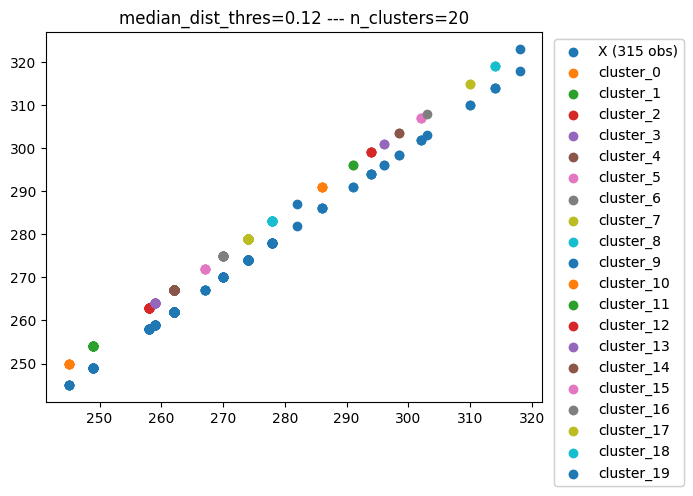

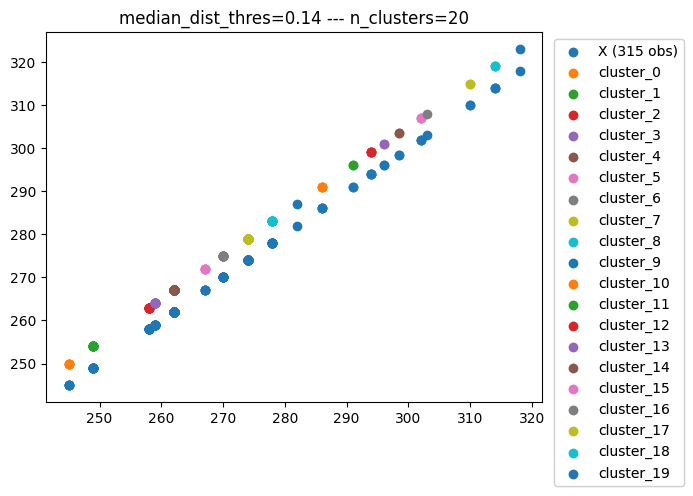

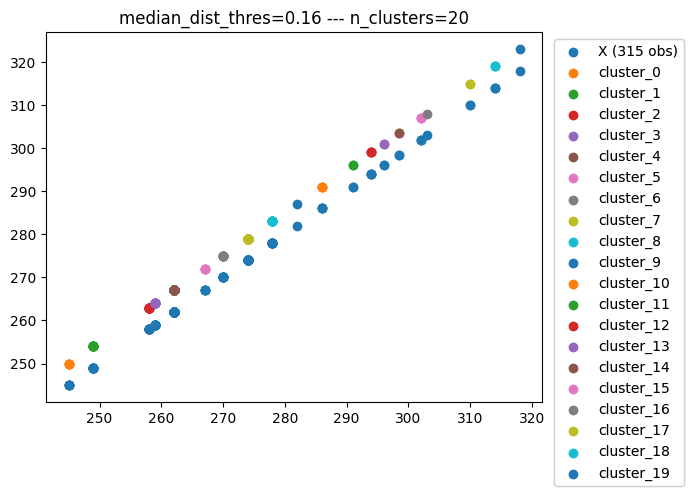

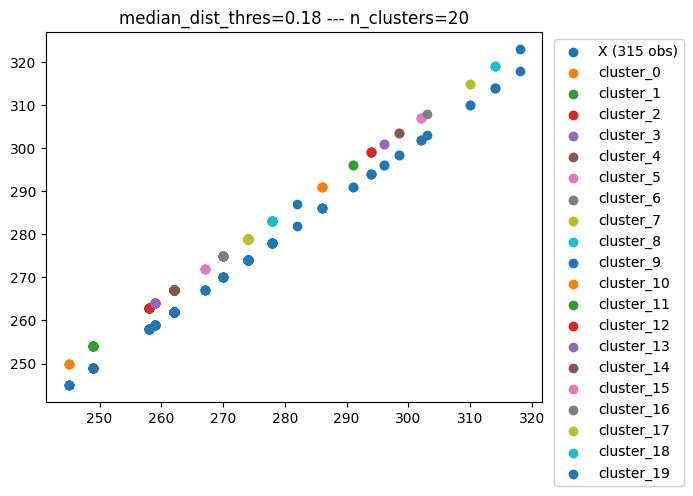

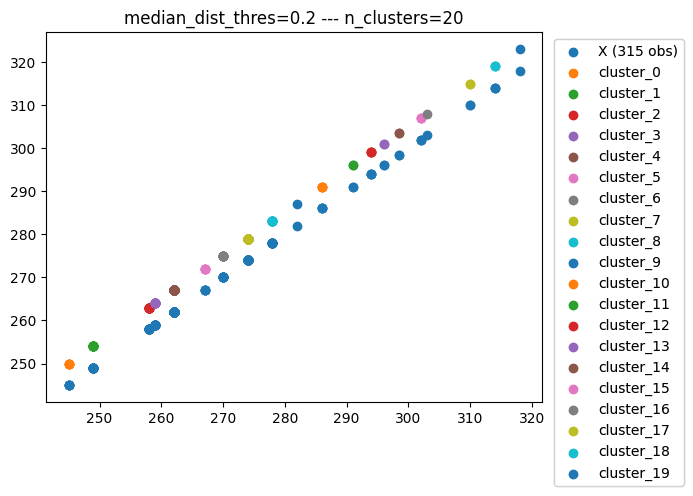

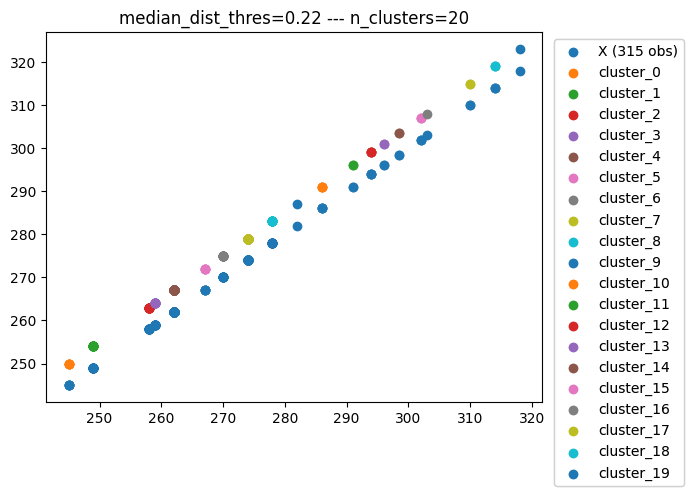

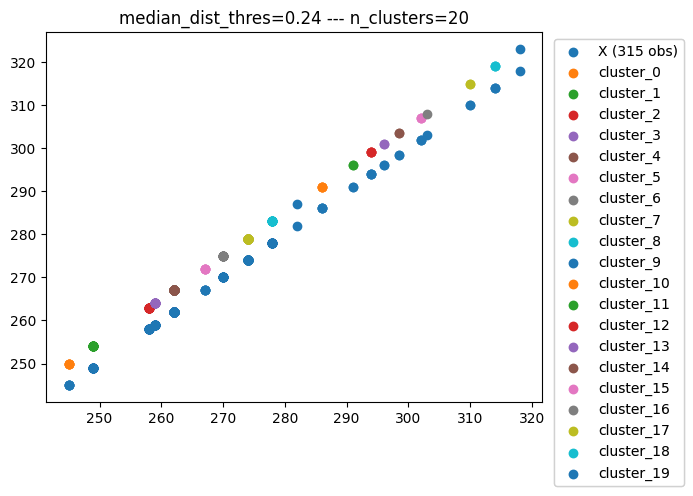

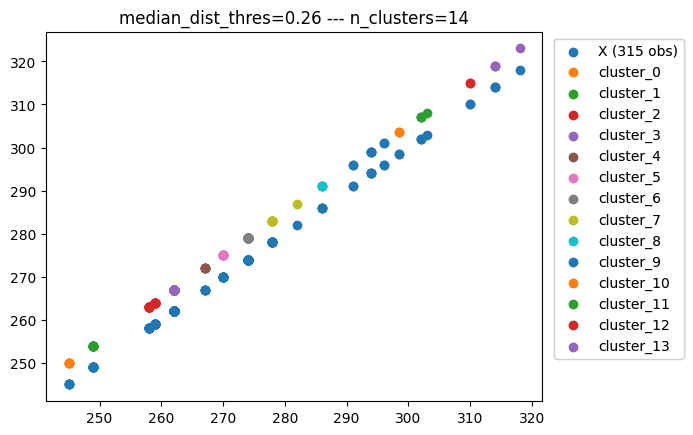

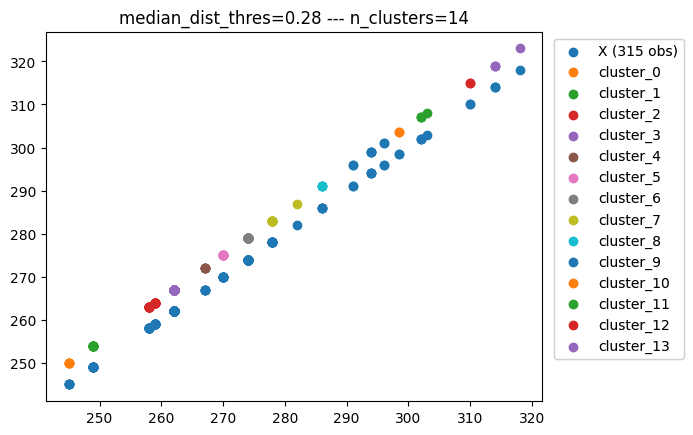

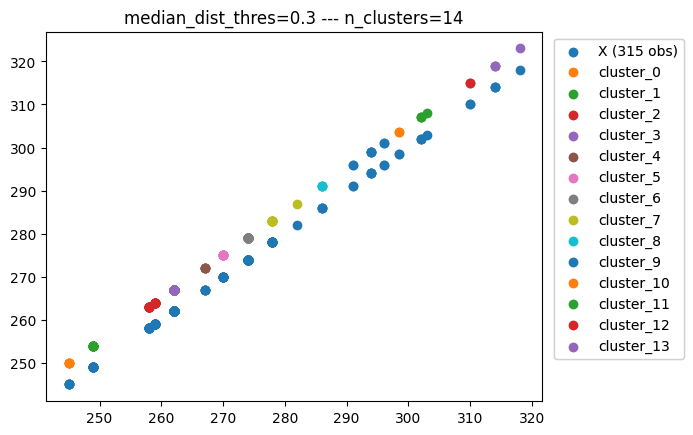

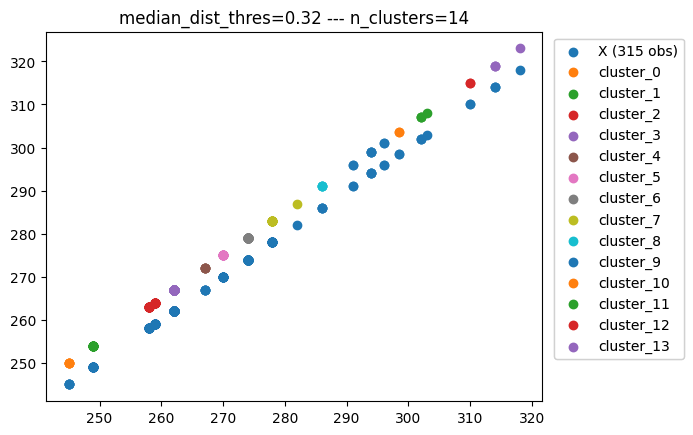

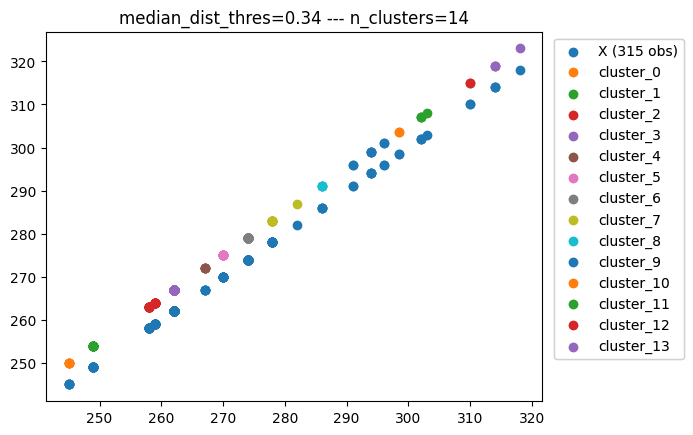

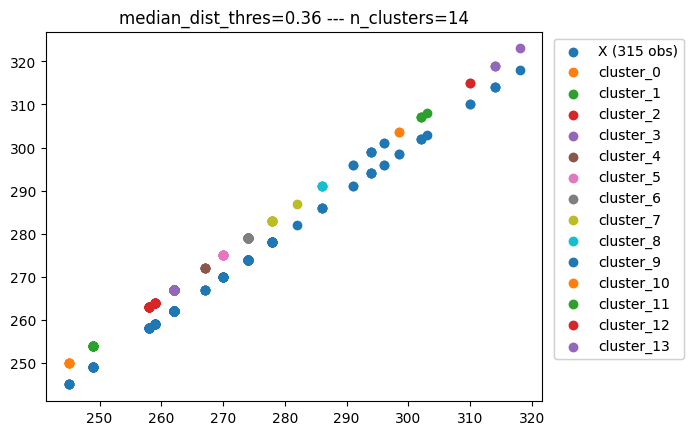

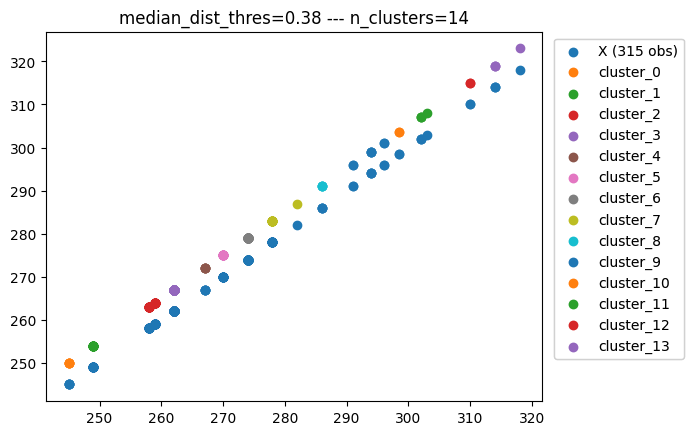

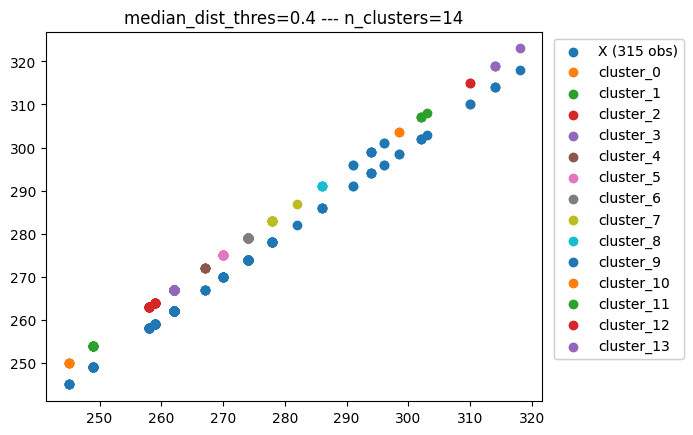

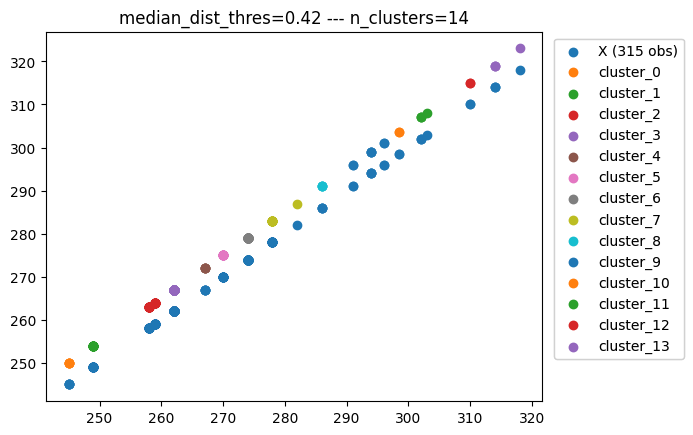

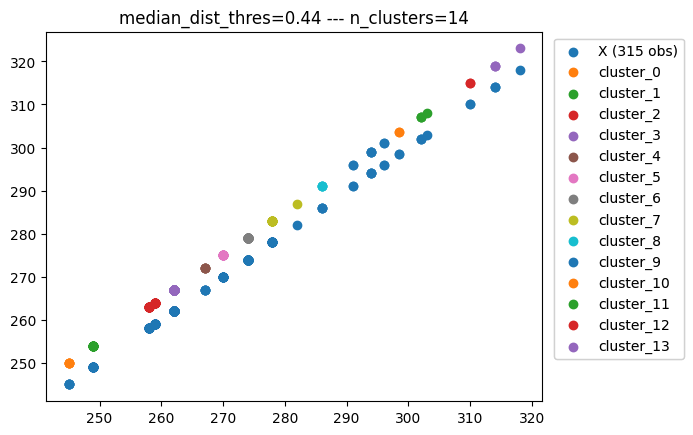

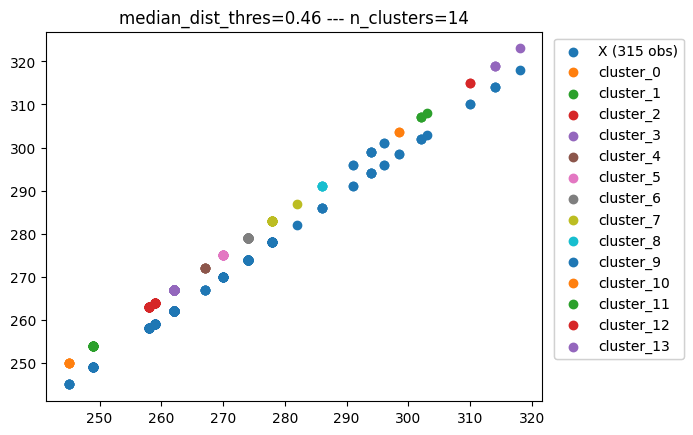

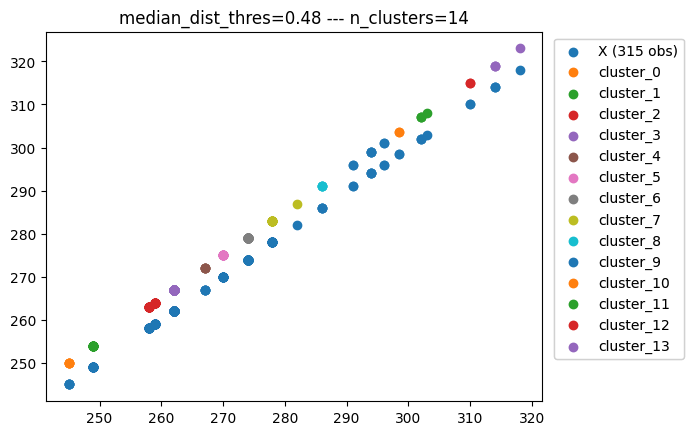

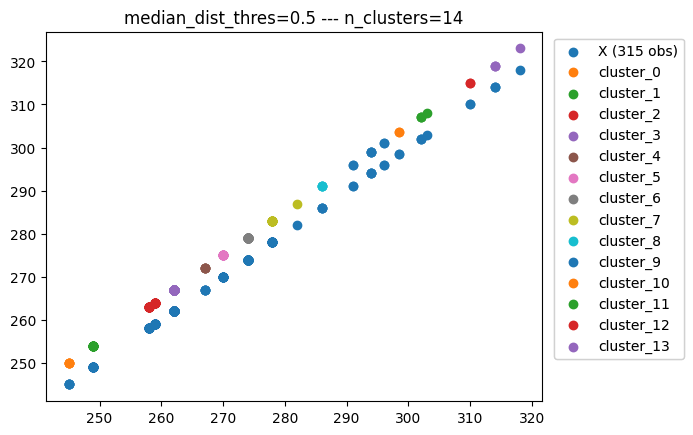

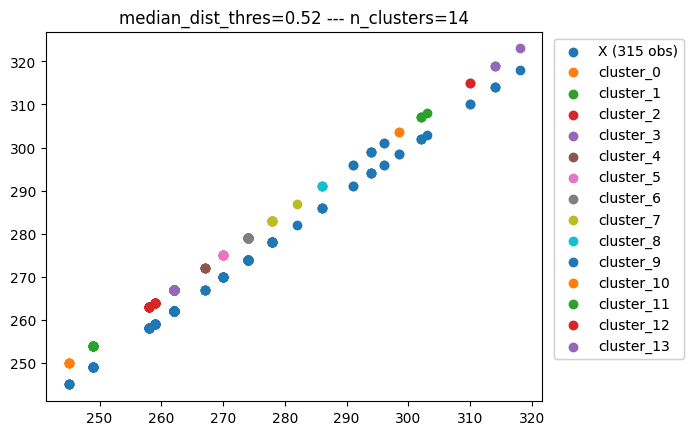

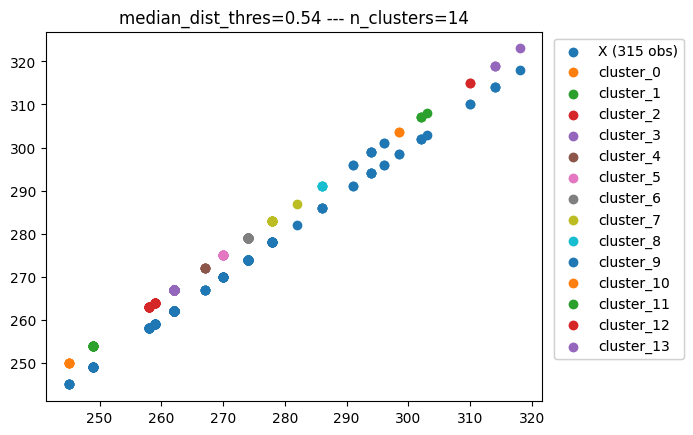

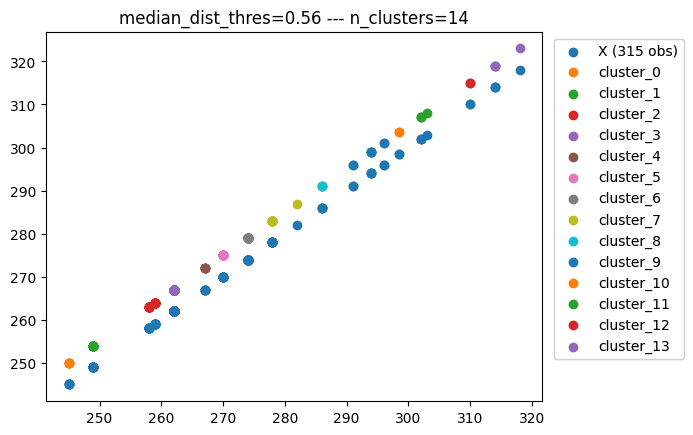

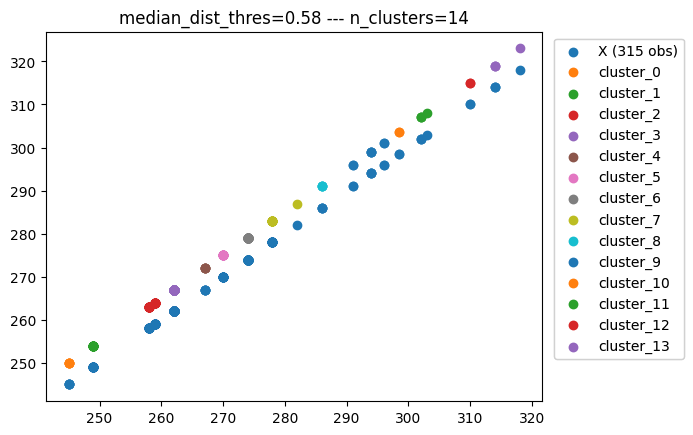

In [4]:
for median_dist_thres_100 in range(10, 60, 2):
    median_dist_thres = median_dist_thres_100 / 100
    centroid, label, inertia = try_clusters(A1, median_dist_thres)
    cluster_count = len(centroid)
    #print(centroid, label, inertia)

    A1_l = []
    lab = list(range(cluster_count))
    #print(lab)
    lab.sort(key=lambda x: centroid[x])
    #print(lab)
    for l in lab:
        A1_l.append(A1[np.where(label==l)])
    #print(A1_l)

    fig, ax = plt.subplots()
    plt.scatter(A1, A1, label='X ({} obs)'.format(len(A1)))
    for l in range(len(A1_l)):
        #print(A1_l[l])
        plt.scatter(A1_l[l], A1_l[l] + 5, label='cluster_'+str(l))
    #plt.scatter(A1_l[0], A1_l[0] + 5, label='cluster_'+str(0))
    leg = plt.legend(bbox_to_anchor=(1.3, 1))
    fig.add_artist(leg)
    plt.title("median_dist_thres="+str(median_dist_thres)+" --- n_clusters="+str(cluster_count))
    plt.show()